In [59]:
# Upper Confidence Bound

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


In [60]:
# Importing the dataset
simulation_data = pd.read_csv('Ads_CTR_Optimisation.csv')
simulation_data.head(10)


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [68]:
# Implementing UCB

N = 10000
number_ads = 10
number_of_display = [0] * number_ads
number_of_clicks = [0] * number_ads
delta = [0] * number_ads
taux_de_click = [0] * number_ads
display_history = []

In [69]:
def calcul_taux_de_click (ad_index):
    taux_de_click[ad_index] = number_of_clicks[ad_index] / (number_of_display[ad_index] + 1)
    return taux_de_click

In [70]:
def calcul_delta (n, ad_index):
    
    return math.sqrt(3/2 * math.log(n+1) / (number_of_display[ad_index]+1))

In [71]:
def calcul_UCB (ad_index): 
    return taux_de_click[ad_index] + delta[ad_index]
    

In [72]:
for n in range(0, N):
    current_ad = 0
    best_UCB = 0.0
    for i in range(0, number_ads):
        taux_de_click = calcul_taux_de_click(i)
        delta[i] = calcul_delta(n, i)
        current_UCB = calcul_UCB(i)   
        if current_UCB > best_UCB:
            best_UCB = current_UCB
            current_ad = i
    number_of_display[current_ad] = number_of_display[current_ad] + 1
    display_result = simulation_data.values[n, current_ad]
    number_of_clicks[current_ad] = number_of_clicks[current_ad] + display_result
    if n % 100 == 0 :
        print("appending ", number_of_display)
        display_history.append(number_of_display.copy())

appending  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
appending  [10, 10, 11, 10, 15, 7, 9, 11, 9, 9]
appending  [16, 24, 18, 20, 38, 13, 16, 22, 16, 18]
appending  [24, 34, 29, 32, 56, 18, 21, 39, 24, 24]
appending  [37, 42, 34, 37, 85, 22, 26, 59, 31, 28]
appending  [51, 51, 42, 48, 105, 27, 30, 69, 42, 36]
appending  [57, 59, 48, 57, 136, 31, 38, 86, 48, 41]
appending  [75, 63, 51, 62, 173, 34, 45, 102, 51, 45]
appending  [82, 69, 56, 76, 195, 38, 50, 125, 60, 50]
appending  [91, 75, 61, 84, 209, 42, 64, 157, 64, 54]
appending  [96, 87, 66, 93, 236, 46, 69, 181, 69, 58]
appending  [102, 92, 70, 102, 280, 50, 78, 190, 74, 63]
appending  [105, 95, 73, 105, 345, 52, 80, 194, 76, 76]
appending  [118, 104, 77, 115, 363, 56, 89, 213, 85, 81]
appending  [121, 107, 80, 121, 430, 58, 92, 220, 88, 84]
appending  [148, 109, 82, 124, 477, 60, 98, 227, 90, 86]
appending  [154, 111, 87, 125, 541, 61, 99, 245, 91, 87]
appending  [161, 114, 90, 137, 590, 64, 110, 251, 94, 90]
appending  [177, 121, 93, 140, 629

In [73]:
number_of_display

[695, 353, 204, 339, 6527, 140, 381, 937, 231, 193]

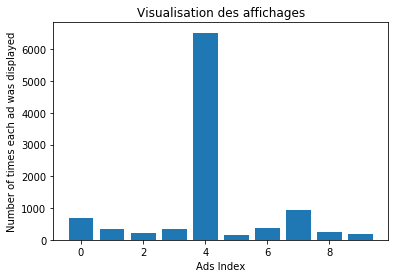

In [74]:
plt.bar(range(10), number_of_display)
plt.title('Visualisation des affichages')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was displayed')
plt.show()

In [75]:
number_of_clicks

[120, 41, 11, 38, 1758, 0, 47, 180, 16, 9]

In [84]:
total_clicks = sum(number_of_clicks)
total_clicks

2220

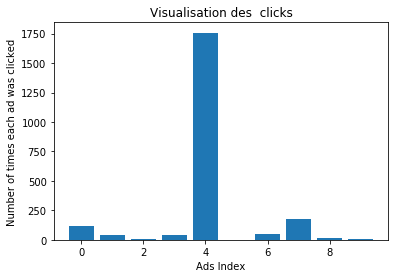

In [76]:
plt.bar(range(10), number_of_clicks)
plt.title('Visualisation des  clicks')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was clicked')
plt.show()

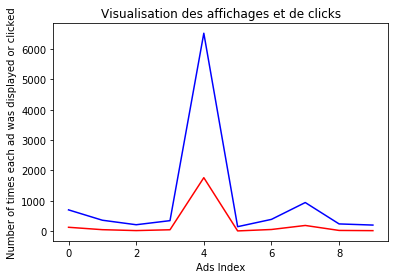

In [77]:
plt.plot(number_of_display, color="blue")
plt.plot(number_of_clicks, color="red")
plt.title('Visualisation des affichages et de clicks')
plt.xlabel('Ads Index')
plt.ylabel('Number of times each ad was displayed or clicked')
plt.show()

In [78]:
total_clicks

2220

In [79]:
display_history

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [10, 10, 11, 10, 15, 7, 9, 11, 9, 9],
 [16, 24, 18, 20, 38, 13, 16, 22, 16, 18],
 [24, 34, 29, 32, 56, 18, 21, 39, 24, 24],
 [37, 42, 34, 37, 85, 22, 26, 59, 31, 28],
 [51, 51, 42, 48, 105, 27, 30, 69, 42, 36],
 [57, 59, 48, 57, 136, 31, 38, 86, 48, 41],
 [75, 63, 51, 62, 173, 34, 45, 102, 51, 45],
 [82, 69, 56, 76, 195, 38, 50, 125, 60, 50],
 [91, 75, 61, 84, 209, 42, 64, 157, 64, 54],
 [96, 87, 66, 93, 236, 46, 69, 181, 69, 58],
 [102, 92, 70, 102, 280, 50, 78, 190, 74, 63],
 [105, 95, 73, 105, 345, 52, 80, 194, 76, 76],
 [118, 104, 77, 115, 363, 56, 89, 213, 85, 81],
 [121, 107, 80, 121, 430, 58, 92, 220, 88, 84],
 [148, 109, 82, 124, 477, 60, 98, 227, 90, 86],
 [154, 111, 87, 125, 541, 61, 99, 245, 91, 87],
 [161, 114, 90, 137, 590, 64, 110, 251, 94, 90],
 [177, 121, 93, 140, 629, 66, 121, 264, 97, 93],
 [203, 125, 96, 144, 665, 69, 125, 277, 101, 96],
 [207, 130, 99, 152, 693, 71, 128, 310, 112, 99],
 [221, 141, 103, 157, 733, 75, 133, 319, 116, 1

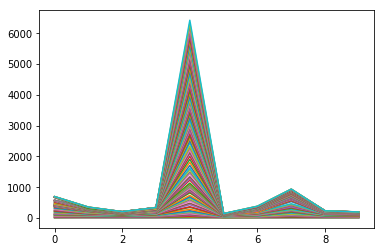

In [86]:
for i in range (0,100):
    plt.plot(display_history[i])